### Computing spectrogram

To move from one type of signal to another, all the `ModusaSignal` should have different `to_` methods.

In [1]:
from modusa.io import AudioLoader

In [2]:
# From file path
audio = AudioLoader.from_fp(
    "../../../../../music/songs/Aditya Rikhari - Faasle.mp3")
audio = audio.crop(20, 40) # Taking first 20 seconds of the signal
audio.info # Use this to print the details of the audio

--------------------------------------------------
Title               : Aditya Rikhari - Faasle.mp3
Kind                : Audio Signal
Duration            : 20.00 sec
Sampling Rate       : 48000 Hz
Sampling Period     : 0.0208 ms
--------------------------------------------------


In [3]:
audio_fig = audio.plot(color="k", legend_loc="lower left")

In [4]:
spec = audio.to_spectrogram()

In [5]:
spec.info

--------------------------------------------------
Title               : Aditya Rikhari - Faasle.mp3
Kind                : Spectrogram
Shape               : (1025, 1876) (freq bins × time frames)
Time resolution     : 0.0107 sec (10.67 ms)
Freq resolution     : 23.44 Hz
--------------------------------------------------


In [6]:
spec_fig = abs(spec).plot()

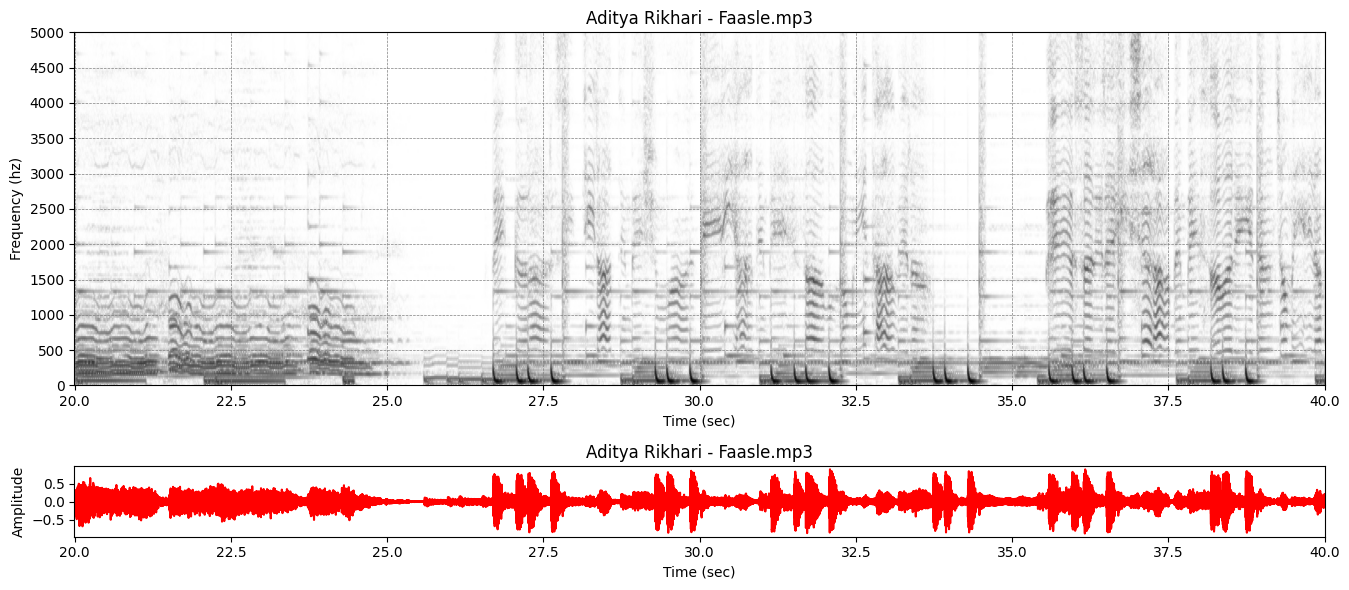

In [7]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2, figsize=(14, 6), width_ratios=[1, 0.02], height_ratios=[1, 0.2])

# Share x-axis manually between first column (axs[0,0] and axs[1,0])
axs[0, 0].sharex(axs[0, 0])  # Now only first column shares x-axis
axs[1, 0].sharex(axs[0, 0])  # Now only first column shares x-axis

# Plot
(1 + abs(spec)).log().plot(ax=axs[0, 0], show_colorbar=True, cax=axs[0, 1], origin="lower", ylim=(0, 5000))
audio.plot(ax=axs[1, 0], color="r")

# Clean up unused colorbar slot in bottom row
axs[0, 1].remove()
axs[1, 1].remove()

plt.tight_layout()
plt.show()